<a href="https://colab.research.google.com/github/anissval/colabs-data-analytics-/blob/main/modulo8/Trabajo_Final_M%C3%B3dulo_8_Aprendizaje_Autom%C3%A1tico_Machine_Learning_VALDIVIEZO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 8 - Aprendizaje Automático - Machine Learning**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Valdiviezo Anahí Ayelén
~~~

# **Aclaraciones previas**



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.


In [428]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Carga de módulos y datos necesarios**

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Creación del DataFrame**

In [430]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"
analisis = pd.read_csv(url+archivo)


# **Análisis Exploratorio de los datos**

## Visualización del conjunto de datos

In [431]:
analisis.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [432]:
analisis.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Tipos de datos

In [433]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Dimensión del conjunto de datos y valores nulos y faltantes

In [434]:
analisis.shape

(45211, 17)

In [435]:
analisis.size

768587

In [436]:
analisis.isna().sum().sort_values() 

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
y            0
dtype: int64

In [437]:
analisis.replace({"unknown": None}, inplace=True)

In [438]:
analisis.isna().sum().sort_values() 

age              0
previous         0
pdays            0
campaign         0
duration         0
month            0
day              0
y                0
housing          0
balance          0
default          0
marital          0
loan             0
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64

In [439]:
analisis.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
5,35,management,married,tertiary,no,231,yes,no,None,5,may,139,1,-1,0,None,no
6,28,management,single,tertiary,no,447,yes,yes,None,5,may,217,1,-1,0,None,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,None,5,may,380,1,-1,0,None,no
8,58,retired,married,primary,no,121,yes,no,None,5,may,50,1,-1,0,None,no
9,43,technician,single,secondary,no,593,yes,no,None,5,may,55,1,-1,0,None,no


## Variable Objetivo

In [440]:
px.histogram(analisis, 
             x = analisis.y,
             title="Distribución variable objetivo", 
             color_discrete_sequence = ["red"], # color 
             marginal="rug",
             template="gridon")

## Variables numéricas, análisis descriptivo

In [441]:
round(analisis.select_dtypes(include=["float64", "int"]).describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [442]:
px.histogram(analisis, 
             x = analisis.age,
             title="Edades", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

In [443]:
px.histogram(analisis, 
             x = analisis.balance,
             title="Balance", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

**Probando cajas y bigotes**

In [444]:
px.histogram(analisis, 
             x = analisis.day,
             title="Day", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

In [445]:
px.histogram(analisis, 
             x = analisis.duration,
             title="Duration", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

In [446]:
px.histogram(analisis, 
             x = analisis.campaign,
             title="Campaingn", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

In [447]:
px.histogram(analisis, 
             x = analisis.pdays,
             title="pdays", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

In [448]:
px.histogram(analisis, 
             x = analisis.previous,
             title="previous", 
             color_discrete_sequence = ["blue"], # color 
             template="gridon")

## Otras variables, análisis descriptivo

In [449]:
analisis.select_dtypes(include=["object"]).describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


In [450]:
px.histogram(analisis, 
             x = analisis.marital,
             title="Marital", 
             color_discrete_sequence = ["turquoise"], # color 
             template="gridon")

In [451]:
px.histogram(analisis, 
             x = analisis.education,
             title="Education", 
             color_discrete_sequence = ["turquoise"], # color 
             template="gridon")

In [452]:
px.histogram(analisis, 
             x = analisis.default,
             title="Default", 
             color_discrete_sequence = ["turquoise"], # color 
             template="gridon")

In [453]:
px.histogram(analisis, 
             x = analisis.housing,
             title="Housing", 
             color_discrete_sequence = ["turquoise"], # color 
             template="gridon")

In [454]:
px.histogram(analisis, 
             x = analisis.loan,
             title="Loan", 
             color_discrete_sequence = ["turquoise"], # color 
             template="gridon")

## Correlación de variables

In [455]:
corr_matrix = analisis.select_dtypes(include=['float64', 'int']).corr(method='pearson')

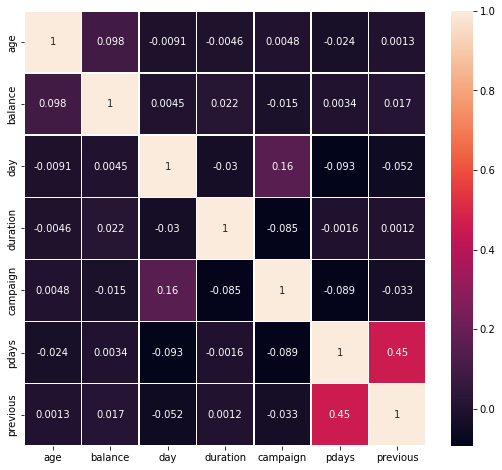

In [456]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

# **División del conjunto de datos**

In [457]:
nombre_columnas = analisis.columns.values.tolist()
var_objetivo = nombre_columnas[16]
var_predictoras = nombre_columnas[0:16]
var_predictoras

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [458]:
y = analisis[var_objetivo]
x = analisis[var_predictoras]

In [459]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,train_size   = 0.8,
                                                    random_state = 2021, shuffle = True)

In [460]:
X_train.shape

(36168, 16)

In [461]:
X_train.shape

(36168, 16)

In [462]:
y_train.shape

(36168,)

In [463]:
y_test.shape

(9043,)

# **Preprocesamiento**

## Imputación de valores faltantes

*deben quedar todas las columnas con las mismas cantidades de datos

In [464]:
X_train.drop(['contact', 'poutcome'], axis=1, inplace=True)

In [465]:
X_train.replace({"unknown": np.nan}, inplace=True)

In [466]:
X_train.head(25)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
32096,41,blue-collar,married,primary,no,875,yes,no,14,apr,189,2,-1,0
44532,39,blue-collar,married,secondary,no,1382,yes,no,12,aug,357,1,182,2
14184,54,retired,married,primary,no,0,yes,no,11,jul,159,2,-1,0
19790,41,technician,single,secondary,no,413,yes,yes,8,aug,292,2,-1,0
31026,33,self-employed,married,tertiary,no,627,yes,no,10,feb,208,2,-1,0
38151,24,admin.,married,secondary,no,230,yes,no,15,may,73,1,-1,0
43709,32,student,single,None,no,376,no,no,13,may,457,2,178,3
10452,52,services,married,secondary,no,-336,no,yes,12,jun,111,8,-1,0
11938,35,unemployed,divorced,primary,no,118,no,no,20,jun,12,4,-1,0
145,33,services,married,secondary,no,22,yes,no,5,may,71,1,-1,0


In [467]:
X_test.drop(['contact', 'poutcome'], axis=1, inplace=True)

In [468]:
X_test.replace({"unknown": np.nan}, inplace=True)

In [469]:
X_test.head(25)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
28034,52,management,married,tertiary,no,1392,no,no,28,jan,1121,2,205,3
30198,29,blue-collar,single,secondary,no,0,yes,no,5,feb,16,9,253,1
30033,49,technician,married,tertiary,no,196,no,no,4,feb,9,7,163,24
34961,33,management,single,secondary,no,802,yes,no,6,may,47,1,-1,0
29198,28,management,single,tertiary,no,224,yes,no,2,feb,97,3,-1,0
39512,36,technician,married,tertiary,no,911,yes,yes,25,may,117,2,21,3
17607,41,technician,married,secondary,no,978,no,no,29,jul,55,2,-1,0
24292,51,technician,married,tertiary,no,0,no,no,17,nov,81,1,-1,0
4663,40,management,married,tertiary,no,917,yes,no,20,may,292,1,-1,0
21724,39,technician,single,secondary,no,-225,no,no,19,aug,220,1,-1,0


In [470]:
housingcodificados = pd.get_dummies(X_train["housing"])

In [471]:
housingcodificados

,no,yes
32096,0,1
44532,0,1
14184,0,1
19790,0,1
31026,0,1
...,...,...
2669,0,1
17536,0,1
6201,0,1
27989,1,0


In [472]:
housingcodificados.rename(columns={"no":"housing_no","yes":"housing_yes"}, inplace= True)

In [473]:
housingcodificados

,housing_no,housing_yes
32096,0,1
44532,0,1
14184,0,1
19790,0,1
31026,0,1
...,...,...
2669,0,1
17536,0,1
6201,0,1
27989,1,0


In [474]:
X_train = X_train.join(housingcodificados)

In [475]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,housing_no,housing_yes
32096,41,blue-collar,married,primary,no,875,yes,no,14,apr,189,2,-1,0,0,1
44532,39,blue-collar,married,secondary,no,1382,yes,no,12,aug,357,1,182,2,0,1
14184,54,retired,married,primary,no,0,yes,no,11,jul,159,2,-1,0,0,1
19790,41,technician,single,secondary,no,413,yes,yes,8,aug,292,2,-1,0,0,1
31026,33,self-employed,married,tertiary,no,627,yes,no,10,feb,208,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,30,housemaid,single,secondary,no,49,yes,no,13,may,267,2,-1,0,0,1
17536,58,retired,divorced,tertiary,no,2086,yes,no,29,jul,194,2,-1,0,0,1
6201,28,entrepreneur,single,tertiary,no,219,yes,no,27,may,257,1,-1,0,0,1
27989,58,management,married,tertiary,no,37,no,no,28,jan,236,2,-1,0,1,0


In [476]:
X_train["education"] = X_train.education.fillna(value="secondary")


In [477]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,housing_no,housing_yes
32096,41,blue-collar,married,primary,no,875,yes,no,14,apr,189,2,-1,0,0,1
44532,39,blue-collar,married,secondary,no,1382,yes,no,12,aug,357,1,182,2,0,1
14184,54,retired,married,primary,no,0,yes,no,11,jul,159,2,-1,0,0,1
19790,41,technician,single,secondary,no,413,yes,yes,8,aug,292,2,-1,0,0,1
31026,33,self-employed,married,tertiary,no,627,yes,no,10,feb,208,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,30,housemaid,single,secondary,no,49,yes,no,13,may,267,2,-1,0,0,1
17536,58,retired,divorced,tertiary,no,2086,yes,no,29,jul,194,2,-1,0,0,1
6201,28,entrepreneur,single,tertiary,no,219,yes,no,27,may,257,1,-1,0,0,1
27989,58,management,married,tertiary,no,37,no,no,28,jan,236,2,-1,0,1,0


In [478]:
X_train["job"] = X_train.job.fillna(value="employed")


In [479]:
X_train.isna().sum().sort_values() 

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
housing_no     0
housing_yes    0
dtype: int64

## Codificación de variables no numéricas

*que todas las variables sean numericas

In [480]:
etiqueta_ordenada = LabelEncoder()

In [481]:
X_train["educ_level"] = etiqueta_ordenada.fit_transform(X_train["education"])

In [482]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,housing_no,housing_yes,educ_level
32096,41,blue-collar,married,primary,no,875,yes,no,14,apr,189,2,-1,0,0,1,0
44532,39,blue-collar,married,secondary,no,1382,yes,no,12,aug,357,1,182,2,0,1,1
14184,54,retired,married,primary,no,0,yes,no,11,jul,159,2,-1,0,0,1,0
19790,41,technician,single,secondary,no,413,yes,yes,8,aug,292,2,-1,0,0,1,1
31026,33,self-employed,married,tertiary,no,627,yes,no,10,feb,208,2,-1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,30,housemaid,single,secondary,no,49,yes,no,13,may,267,2,-1,0,0,1,1
17536,58,retired,divorced,tertiary,no,2086,yes,no,29,jul,194,2,-1,0,0,1,2
6201,28,entrepreneur,single,tertiary,no,219,yes,no,27,may,257,1,-1,0,0,1,2
27989,58,management,married,tertiary,no,37,no,no,28,jan,236,2,-1,0,1,0,2


In [483]:
loancodificados = pd.get_dummies(X_train["loan"])

In [484]:
loancodificados

,no,yes
32096,1,0
44532,1,0
14184,1,0
19790,0,1
31026,1,0
...,...,...
2669,1,0
17536,1,0
6201,1,0
27989,1,0


In [485]:
loancodificados.rename(columns={"no":"loan_no","yes":"loan_yes"}, inplace= True)

In [486]:
loancodificados

,loan_no,loan_yes
32096,1,0
44532,1,0
14184,1,0
19790,0,1
31026,1,0
...,...,...
2669,1,0
17536,1,0
6201,1,0
27989,1,0


In [487]:
X_train = X_train.join(loancodificados)

In [488]:
X_train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,housing_no,housing_yes,educ_level,loan_no,loan_yes
32096,41,blue-collar,married,primary,no,875,yes,no,14,apr,189,2,-1,0,0,1,0,1,0
44532,39,blue-collar,married,secondary,no,1382,yes,no,12,aug,357,1,182,2,0,1,1,1,0
14184,54,retired,married,primary,no,0,yes,no,11,jul,159,2,-1,0,0,1,0,1,0
19790,41,technician,single,secondary,no,413,yes,yes,8,aug,292,2,-1,0,0,1,1,0,1
31026,33,self-employed,married,tertiary,no,627,yes,no,10,feb,208,2,-1,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,30,housemaid,single,secondary,no,49,yes,no,13,may,267,2,-1,0,0,1,1,1,0
17536,58,retired,divorced,tertiary,no,2086,yes,no,29,jul,194,2,-1,0,0,1,2,1,0
6201,28,entrepreneur,single,tertiary,no,219,yes,no,27,may,257,1,-1,0,0,1,2,1,0
27989,58,management,married,tertiary,no,37,no,no,28,jan,236,2,-1,0,1,0,2,1,0
